Modes: train, valid, predict

Tasks: detect, segment, classify

Data: Format can differ for task types, supports data.yaml, data_folder, data_name

In [8]:
!pip install ultralytics

In [9]:
import os
from IPython import display
display.clear_output()
mode = 'checks'

from ultralytics import YOLO
from IPython.display import display, Image

In [10]:
!yolo task=segment mode=predict model=yolov8l-seg.pt conf=0.4 source="https://media.roboflow.com/notebooks/examples/dog.jpeg"

100% 88.1M/88.1M [00:00<00:00, 283MB/s]
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

100% 104k/104k [00:00<00:00, 80.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 125.6ms
Speed: 2.0ms preprocess, 125.6ms inference, 45.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


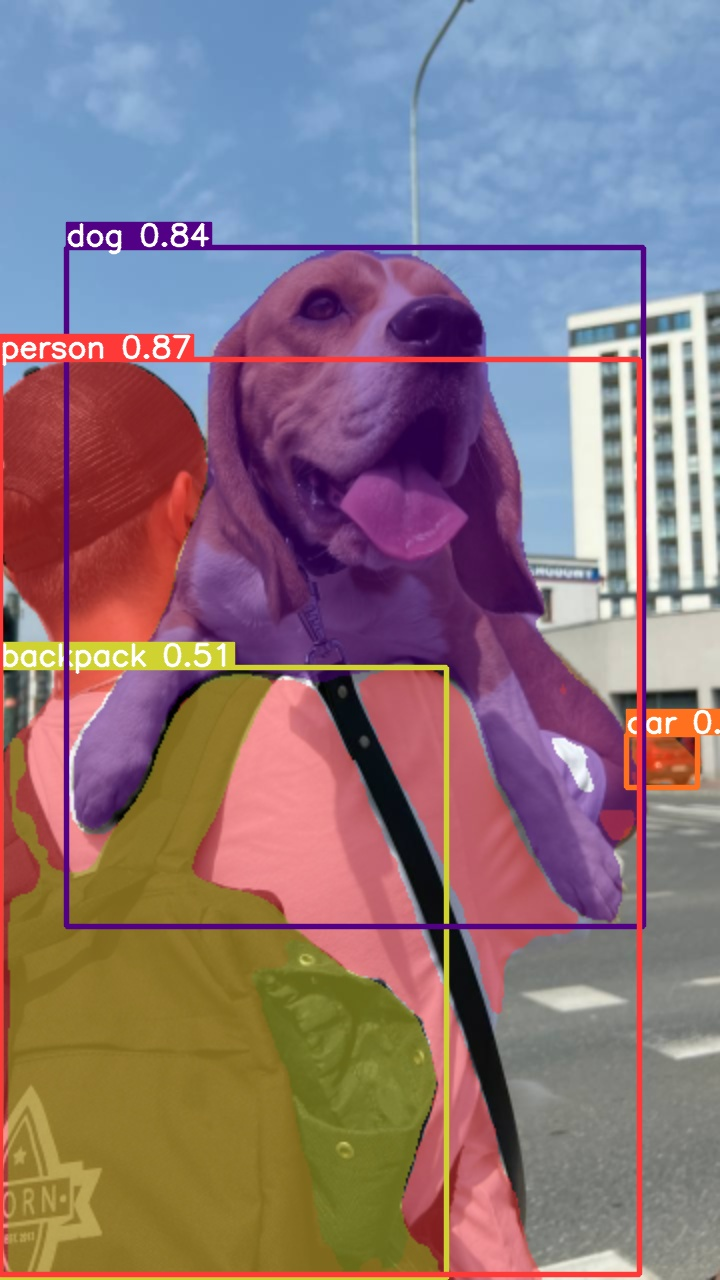

In [11]:
Image(filename="runs/segment/predict/dog.jpeg", height=300)

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lMkyG1ihMD3KRFoJc9Bv")
project = rf.workspace("nicolai-hoirup-nielsen").project("cupsegmentation")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to CupSegmentation-1 in yolov8:: 100%|██████████| 730/730 [00:00<00:00, 3388.90it/s]


In [12]:
!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=15 imgsz=640

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/CupSegmentation-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

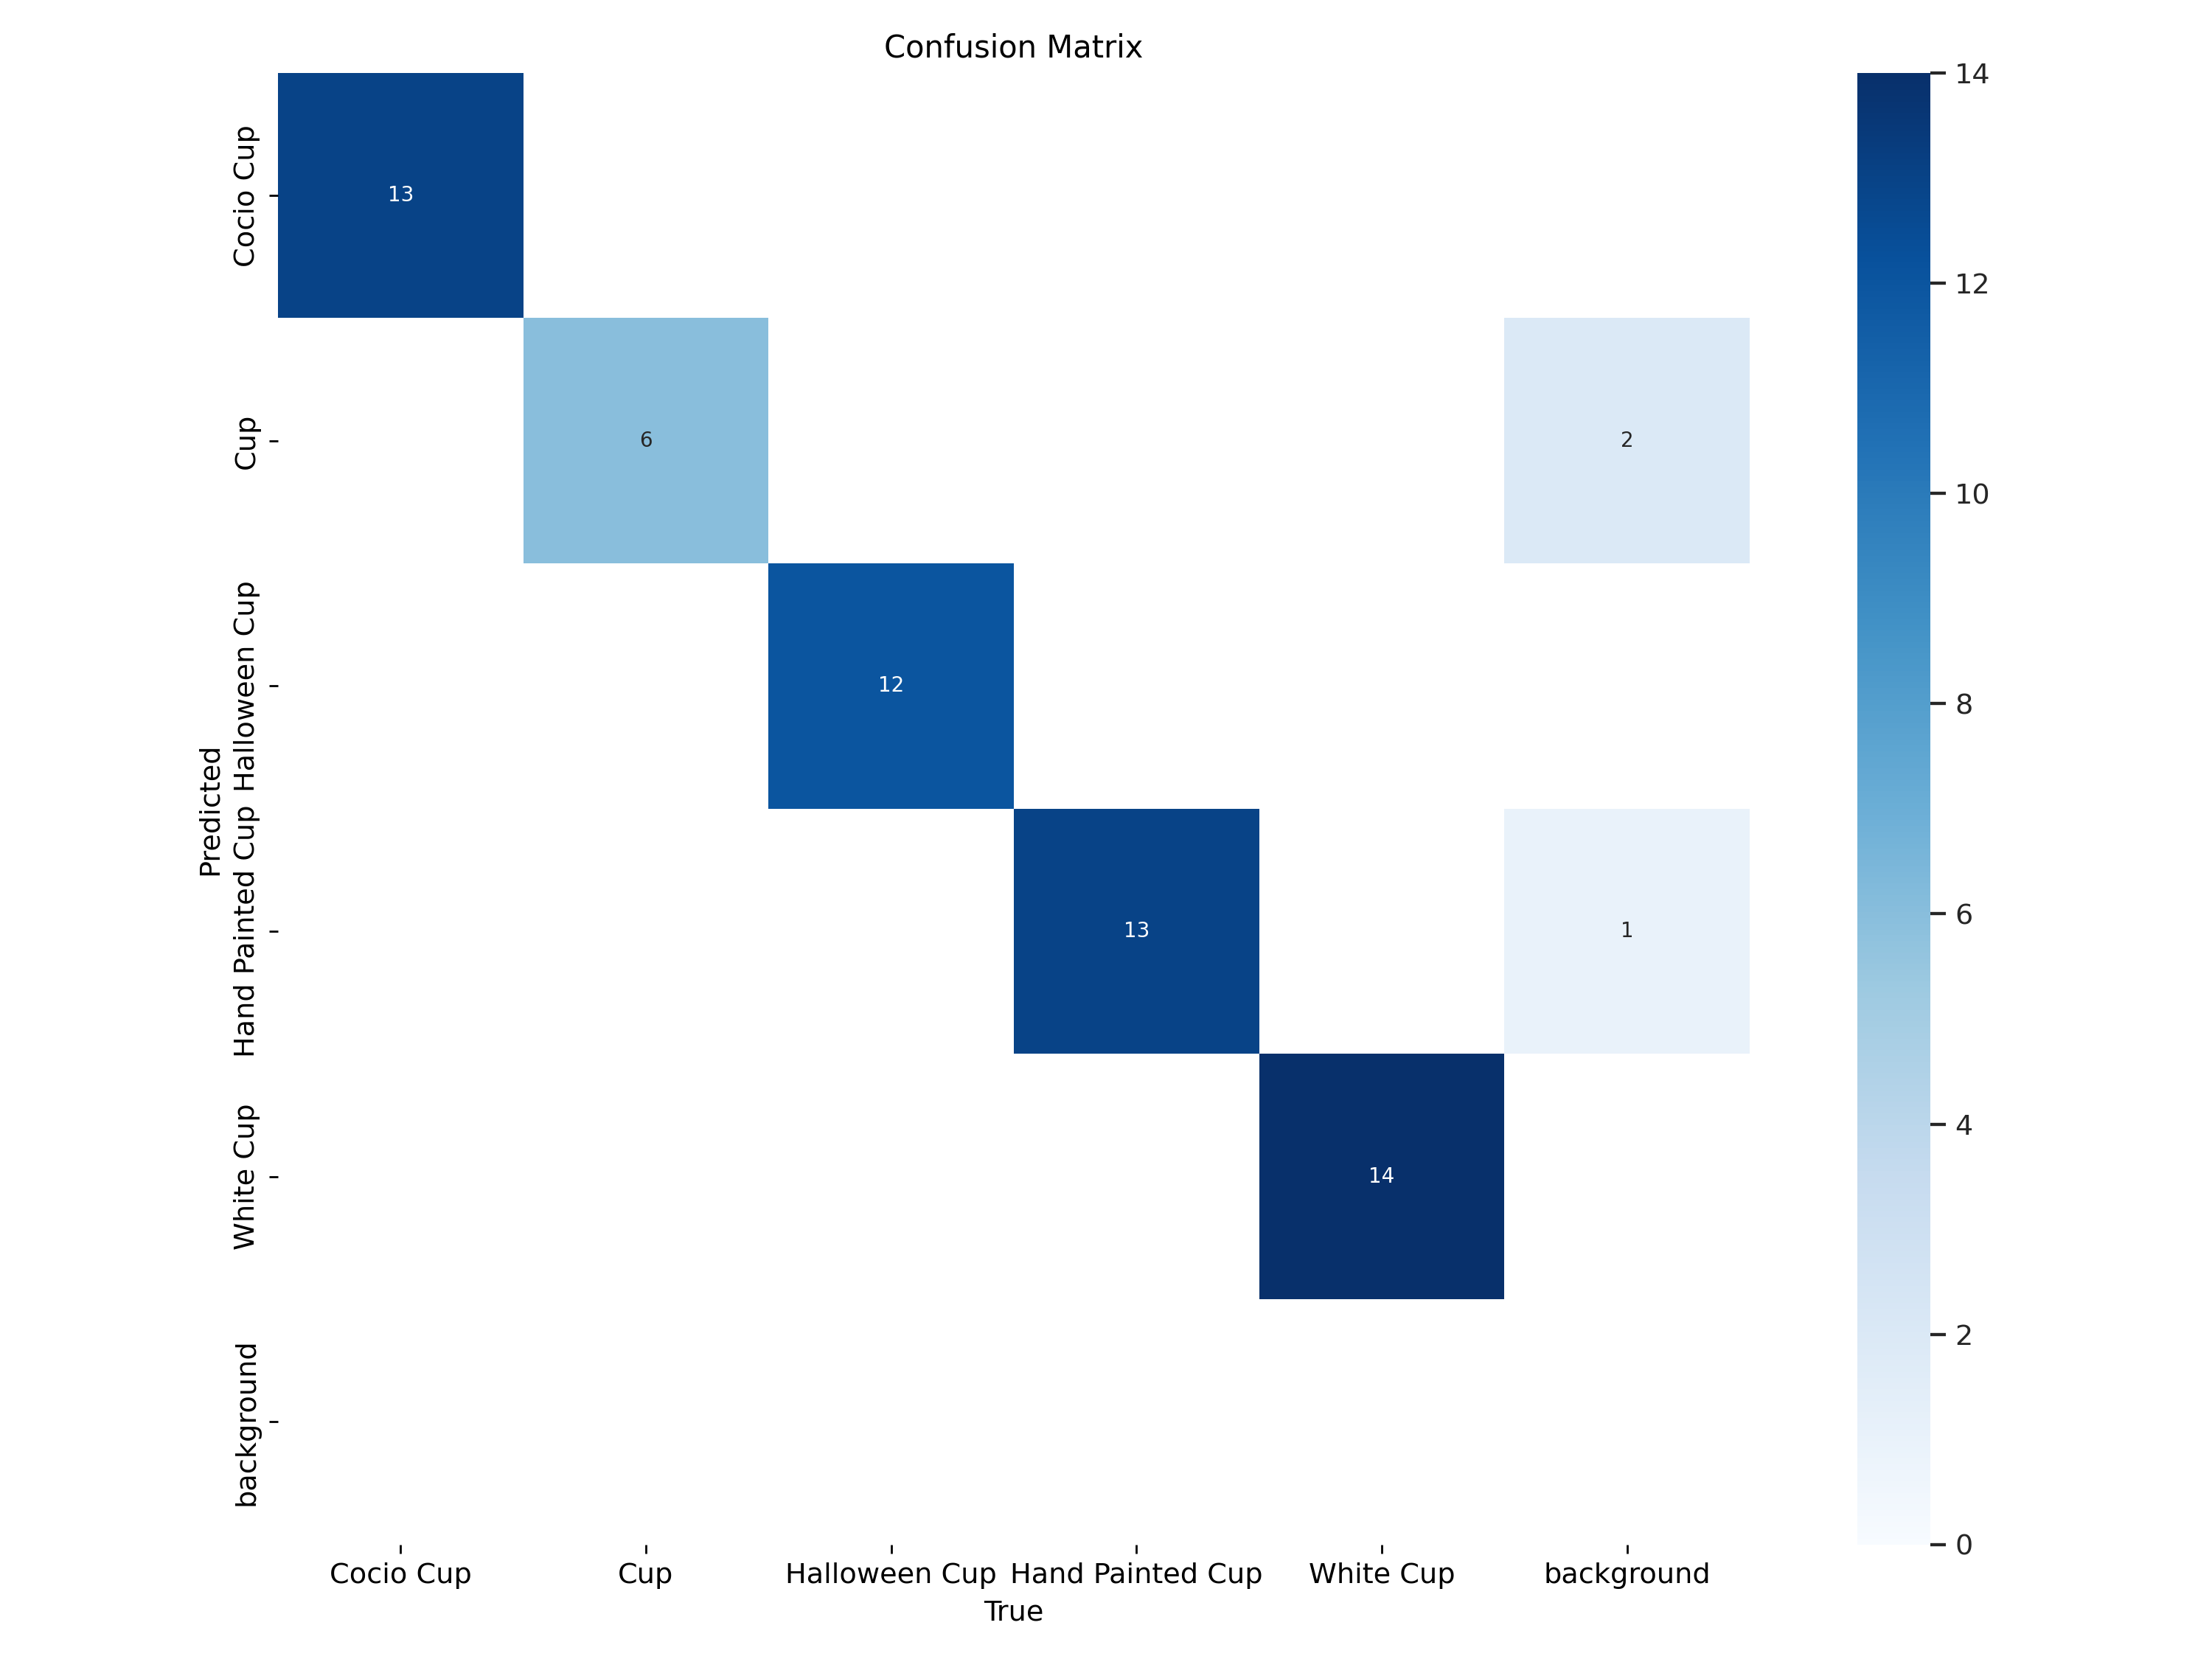

In [13]:
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

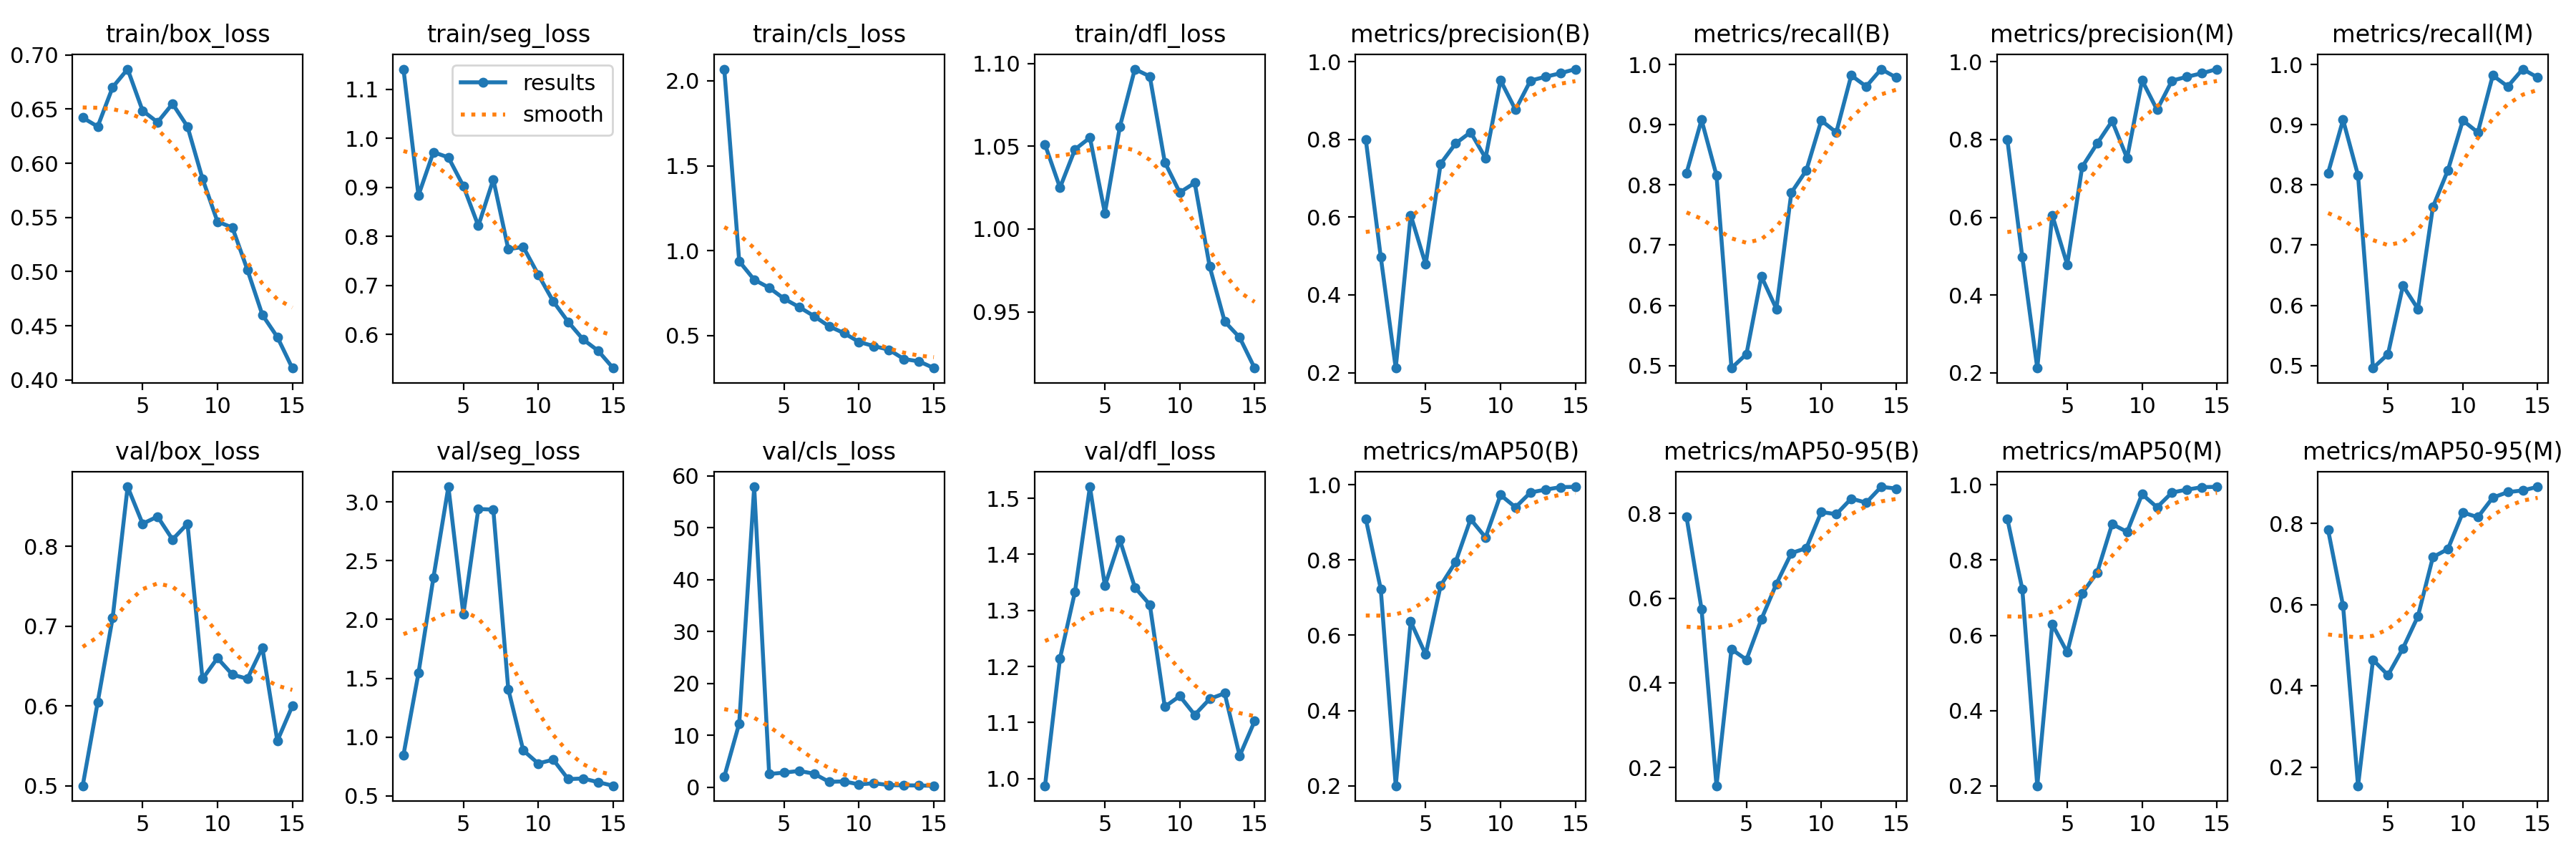

In [14]:
Image(filename=f'/content/runs/segment/train/results.png', width=800)

In [15]:
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45915743 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/CupSegmentation-1/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.29it/s]
                   all         19         58      0.981      0.978      0.995      0.858      0.981      0.978      0.995      0.892
             Cocio Cup         19         13          1      0.989      0.995      0.952          1      0.989      0.995      0.959
                   Cup         19          6       0.96          1      0.995      0.995       0.96          1      0.995       0.93
         Halloween Cup         19         12          1      0.902      0.995      0.681          1      0.902      0.995      0.

In [16]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.4 data={dataset.location}/test/images

WARNING ⚠️ 'source' is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45915743 parameters, 0 gradients, 220.1 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 229.5ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 113.0ms
Speed: 2.7ms preprocess, 171.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


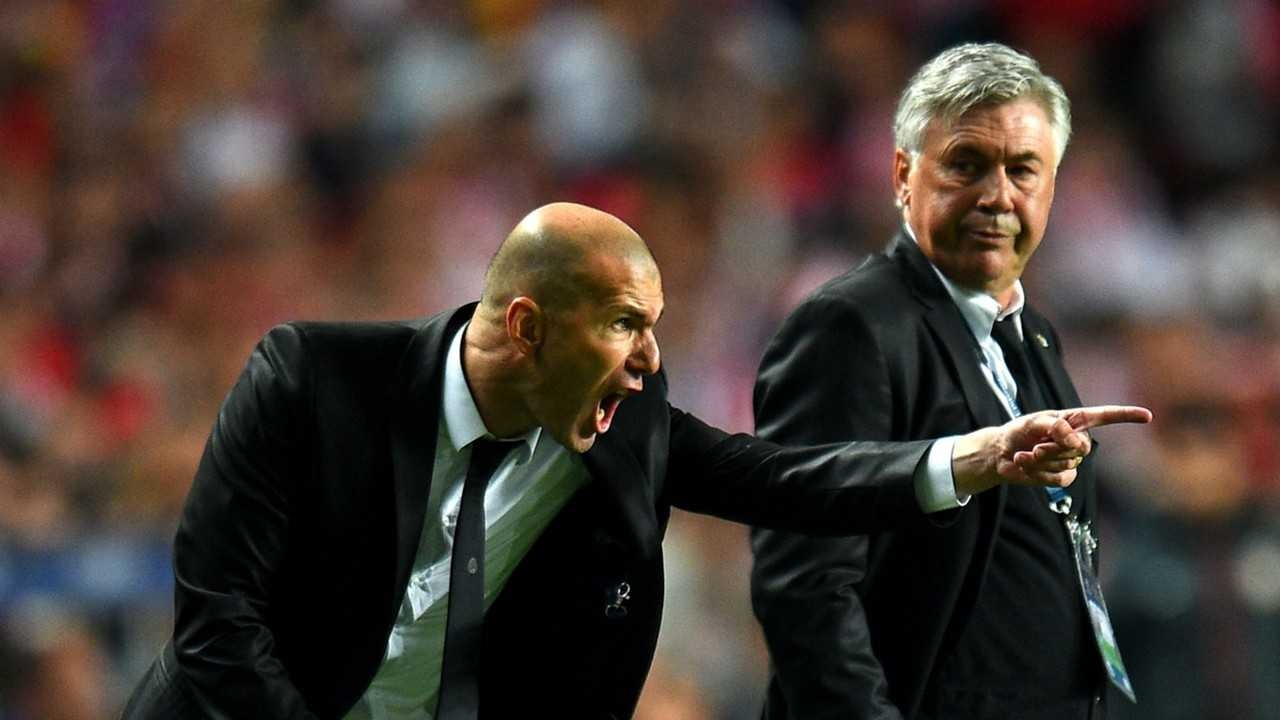

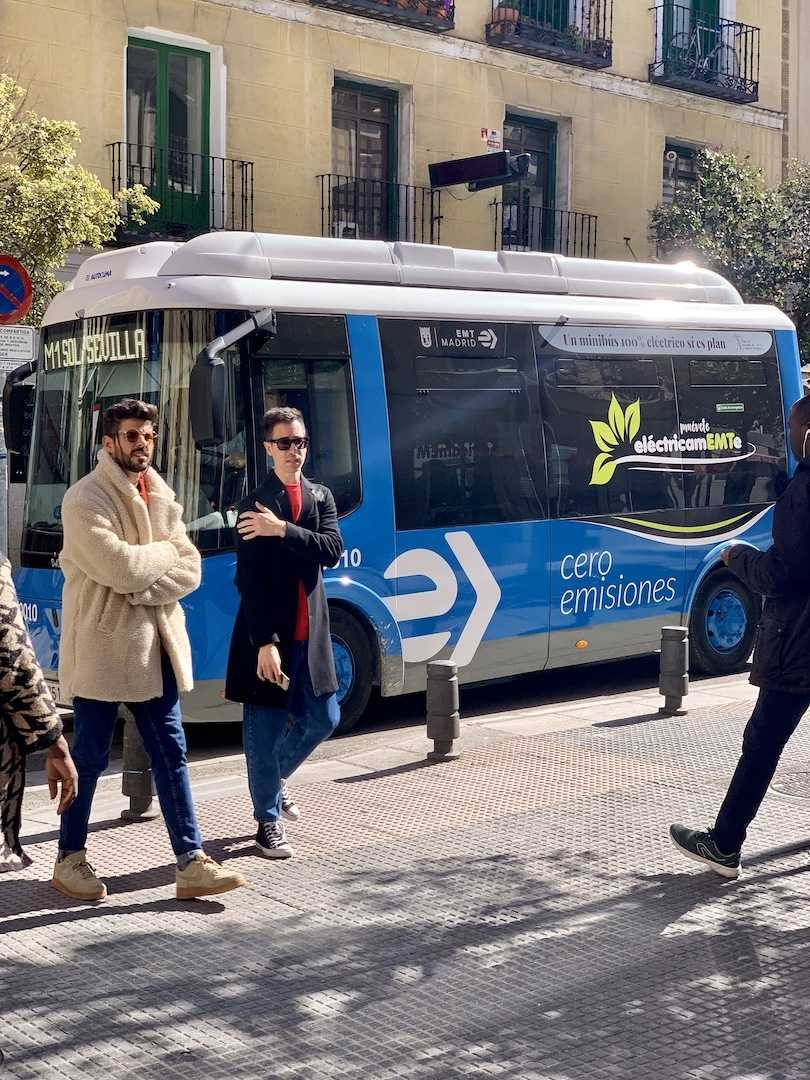

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict2/*.jpg')[:5]:
  display(Image(filename=image_path, height=500))
  print("\n")